# TODO: Title

This notebook lists all the steps that you need to complete the complete this project. You will need to complete all the TODOs in this notebook as well as in the README and the two python scripts included with the starter code.


**TODO**: Give a helpful introduction to what this notebook is for. Remember that comments, explanations and good documentation make your project informative and professional.

**Note:** This notebook has a bunch of code and markdown cells with TODOs that you have to complete. These are meant to be helpful guidelines for you to finish your project while meeting the requirements in the project rubrics. Feel free to change the order of these the TODO's and use more than one TODO code cell to do all your tasks.

In [2]:
# TODO: Install any packages that you might need
# For instance, you will need the smdebug package
!pip install smdebug

Keyring is skipped due to an exception: 'keyring.backends'
  Using cached smdebug-1.0.12-py2.py3-none-any.whl (270 kB)
  Using cached pyinstrument-3.4.2-py2.py3-none-any.whl (83 kB)
  Using cached pyinstrument_cext-0.2.4-cp37-cp37m-manylinux2010_x86_64.whl (20 kB)


In [3]:
# TODO: Import any packages that you might need
# For instance you will need Boto3 and Sagemaker
import sagemaker
import boto3


import sagemaker
from sagemaker.tuner import (
    IntegerParameter,
    CategoricalParameter,
    ContinuousParameter,
    HyperparameterTuner,
)


import boto3
import pytest
from sagemaker.pytorch import PyTorch
from sagemaker import get_execution_role
from sagemaker.debugger import (
    Rule,
    DebuggerHookConfig,
    TensorBoardOutputConfig,
    CollectionConfig,
    rule_configs,
)

sagemaker_session = sagemaker.Session()

bucket = sagemaker_session.default_bucket()
prefix = "sagemaker/PROJECT-pytorch-DOG"

role = sagemaker.get_execution_role()

## Dataset
TODO: Explain what dataset you are using for this project. Maybe even give a small overview of the classes, class distributions etc that can help anyone not familiar with the dataset get a better understand of it.

In [4]:
#TODO: Fetch and upload the data to AWS S3

# Command to download and unzip data
#!wget https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip
#!unzip dogImages.zip

In [70]:
!ls dogImages

test  train  valid


In [75]:
import os

import os

def list_dirs(path):
    # Get the list of all files and directories in the given path
    entries = os.listdir(path)

    # Filter out any non-directory entries
    dirs = [entry for entry in entries if os.path.isdir(os.path.join(path, entry))]

    # Print the directories, separated by newlines
    for directory in dirs:
        print(directory)
        
    return dirs

dirs = list_dirs("dogImages/test")
#print(dirs)

114.Otterhound
110.Norwegian_lundehund
127.Silky_terrier
091.Japanese_chin
095.Kuvasz
061.English_cocker_spaniel
043.Canaan_dog
131.Wirehaired_pointing_griffon
124.Poodle
087.Irish_terrier
053.Cocker_spaniel
064.English_toy_spaniel
105.Neapolitan_mastiff
032.Boston_terrier
017.Bearded_collie
094.Komondor
003.Airedale_terrier
084.Icelandic_sheepdog
122.Pointer
098.Leonberger
125.Portuguese_water_dog
009.American_water_spaniel
058.Dandie_dinmont_terrier
115.Papillon
006.American_eskimo_dog
041.Bullmastiff
085.Irish_red_and_white_setter
081.Greyhound
004.Akita
103.Mastiff
044.Cane_corso
118.Pembroke_welsh_corgi
013.Australian_terrier
117.Pekingese
002.Afghan_hound
025.Black_and_tan_coonhound
129.Tibetan_mastiff
093.Kerry_blue_terrier
023.Bernese_mountain_dog
070.German_pinscher
052.Clumber_spaniel
048.Chihuahua
088.Irish_water_spaniel
050.Chinese_shar-pei
106.Newfoundland
019.Bedlington_terrier
092.Keeshond
038.Brussels_griffon
108.Norwegian_buhund
097.Lakeland_terrier
062.English_setter


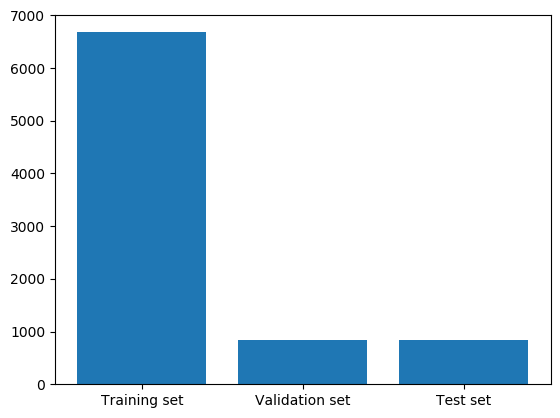

In [78]:
import os
import fnmatch
import matplotlib.pyplot as plt


def count_files(path, pattern):
    count = 0
    for root, _, files in os.walk(path):
        for filename in fnmatch.filter(files, pattern):
            count += 1
    return count

# Example usage: count the number of .jpg files in the given directory and its subdirectories
num_jpgs_train = count_files("dogImages/train/", "*.jpg")
num_jpgs_test = count_files("dogImages/test/", "*.jpg")
num_jpgs_val = count_files("dogImages/valid/", "*.jpg")



# Set the labels for the x-axis
x_labels = ["Training set", "Validation set", "Test set"]

# Set the heights of the bars
heights = [num_jpgs_train, num_jpgs_val, num_jpgs_test]

# Create the bar plot
plt.bar(x_labels, heights)

# Show the plot
plt.show()



In [80]:
x_labels = []
counts = []

for directory in dirs:
    path = "dogImages/test/" + directory
    x_labels.append(directory)
    counts.append(count_files(path, "*.jpg"))

                  
    

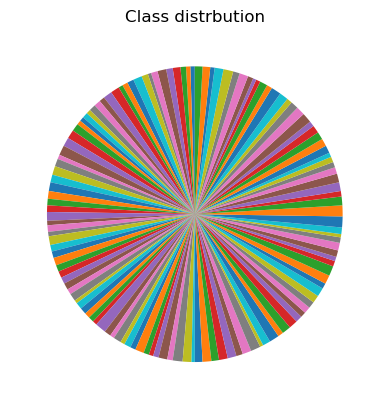

In [86]:
# Set the colors for the pie chart

# Create the pie chart
plt.pie(counts, labels=None, startangle=90)

# Show the plot
plt.title('Class distrbution')
plt.show() # The class distribution is pretty homogenous

In [7]:
inputs = sagemaker_session.upload_data(path="dogImages", bucket=bucket, key_prefix=prefix)
print("input spec (in this case, just an S3 path): {}".format(inputs))

input spec (in this case, just an S3 path): s3://sagemaker-us-east-1-447805070819/sagemaker/PROJECT-pytorch-DOG


In [5]:
s3_path = "s3://sagemaker-us-east-1-447805070819/sagemaker/PROJECT-pytorch-DOG"
s3_path

's3://sagemaker-us-east-1-447805070819/sagemaker/PROJECT-pytorch-DOG'

In [6]:
print(inputs)

NameError: name 'inputs' is not defined

## Hyperparameter Tuning
**TODO:** This is the part where you will finetune a pretrained model with hyperparameter tuning. Remember that you have to tune a minimum of two hyperparameters. However you are encouraged to tune more. You are also encouraged to explain why you chose to tune those particular hyperparameters and the ranges.

**Note:** You will need to use the `hpo.py` script to perform hyperparameter tuning.

In [7]:
#TODO: Declare your HP ranges, metrics etc.


hyperparameter_ranges = {
    "learning_rate": ContinuousParameter(0.001, 0.1),
    "batch_size": CategoricalParameter([32, 64, 128, 256, 512]),
}

In [8]:
#TODO: Create estimators for your HPs

estimator = PyTorch(
    entry_point="hpo.py",
    role=role,
    py_version='py36',
    framework_version="1.8",
    instance_count=1,
    instance_type="ml.p2.xlarge"
)# TODO: Your estimator here


objective_metric_name = "average test loss"
objective_type = "Minimize"
metric_definitions = [{"Name": "average test loss", "Regex": "Test set: Average loss: ([0-9\\.]+)"}]

tuner =HyperparameterTuner(
    estimator,
    objective_metric_name,
    hyperparameter_ranges,
    metric_definitions,
    max_jobs=4,
    max_parallel_jobs=1,
    objective_type=objective_type, 
    early_stopping_type="Auto"
) # TODO: Your HP tuner here



In [9]:
# test hpo.py
#!python hpo.py [-h] [--learning_rate LEARNING_RATE] [--batch_size BATCH_SIZE] [--data DATA] [--model_dir MODEL_DIR] [--output_dir OUTPUT_DIR]

In [16]:
# TODO: Fit your HP Tuner
import os


os.environ['SM_CHANNEL_TRAINING']='s3://sagemaker-us-east-1-447805070819/sagemaker/PROJECT-pytorch-DOG/'
os.environ['SM_MODEL_DIR']='s3://sagemaker-us-east-1-447805070819/model/'
os.environ['SM_OUTPUT_DATA_DIR']='s3://sagemaker-us-east-1-447805070819/output/'
#tuner.fit({"training": "s3://sagemaker-us-east-1-447805070819/dogImages/"})

tuner.fit({"training": s3_path}) # TODO: Remember to include your data channels

No finished training job found associated with this estimator. Please make sure this estimator is only used for building workflow config
No finished training job found associated with this estimator. Please make sure this estimator is only used for building workflow config


..........................................................................................................................................................................................................................................................................................................................................................!


In [17]:
# TODO: Get the best estimators and the best HPs

best_estimator = tuner.best_estimator() #TODO

#Get the hyperparameters of the best trained model
best_estimator.hyperparameters()


2022-12-24 17:26:14 Starting - Preparing the instances for training
2022-12-24 17:26:14 Downloading - Downloading input data
2022-12-24 17:26:14 Training - Training image download completed. Training in progress.
2022-12-24 17:26:14 Uploading - Uploading generated training model
2022-12-24 17:26:14 Completed - Resource reused by training job: pytorch-training-221224-1708-002-204c8721


{'_tuning_objective_metric': '"average test loss"',
 'batch_size': '"128"',
 'learning_rate': '0.03087708635920261',
 'sagemaker_container_log_level': '20',
 'sagemaker_estimator_class_name': '"PyTorch"',
 'sagemaker_estimator_module': '"sagemaker.pytorch.estimator"',
 'sagemaker_job_name': '"pytorch-training-2022-12-24-17-08-50-491"',
 'sagemaker_program': '"hpo.py"',
 'sagemaker_region': '"us-east-1"',
 'sagemaker_submit_directory': '"s3://sagemaker-us-east-1-447805070819/pytorch-training-2022-12-24-17-08-50-491/source/sourcedir.tar.gz"'}

## Results
2022-12-24 17:26:14 Starting - Preparing the instances for training
2022-12-24 17:26:14 Downloading - Downloading input data
2022-12-24 17:26:14 Training - Training image download completed. Training in progress.
2022-12-24 17:26:14 Uploading - Uploading generated training model
2022-12-24 17:26:14 Completed - Resource reused by training job: pytorch-training-221224-1708-002-204c8721
{'_tuning_objective_metric': '"average test loss"',
 'batch_size': '"128"',
 'learning_rate': '0.03087708635920261',
 'sagemaker_container_log_level': '20',
 'sagemaker_estimator_class_name': '"PyTorch"',
 'sagemaker_estimator_module': '"sagemaker.pytorch.estimator"',
 'sagemaker_job_name': '"pytorch-training-2022-12-24-17-08-50-491"',
 'sagemaker_program': '"hpo.py"',
 'sagemaker_region': '"us-east-1"',
 'sagemaker_submit_directory': '"s3://sagemaker-us-east-1-447805070819/pytorch-training-2022-12-24-17-08-50-491/source/sourcedir.tar.gz"'}

## Model Profiling and Debugging
TODO: Using the best hyperparameters, create and finetune a new model

**Note:** You will need to use the `train_model.py` script to perform model profiling and debugging.

In [19]:
from sagemaker.debugger import (
    Rule,
    rule_configs, 
    ProfilerRule,
    DebuggerHookConfig,
    CollectionConfig,
    ProfilerConfig,
    FrameworkProfile
)

In [26]:
# TODO: Set up debugging and profiling rules and hooks
rules = [
    Rule.sagemaker(rule_configs.loss_not_decreasing()),
    ProfilerRule.sagemaker(rule_configs.LowGPUUtilization()),
    ProfilerRule.sagemaker(rule_configs.ProfilerReport()),
    Rule.sagemaker(rule_configs.overfit()),
    Rule.sagemaker(rule_configs.overtraining()),
]

profiler_config = ProfilerConfig(
    system_monitor_interval_millis=500, framework_profile_params=FrameworkProfile(num_steps=10)
)
debugger_config = DebuggerHookConfig(
    hook_parameters={"train.save_interval": "100", "eval.save_interval": "10"}
)

In [64]:
print({'batch_size': int(best_estimator.hyperparameters()['batch_size'].replace('"', "")),
                      'learning_rate': best_estimator.hyperparameters()['learning_rate']})

{'batch_size': 128, 'learning_rate': '0.03087708635920261'}


In [30]:
# TODO: Create and fit an estimator

#hyperparameters = best_estimator.hyperparameters() # try this first
hyperparameters={'batch_size': int(best_estimator.hyperparameters()['batch_size'].replace('"', "")),
                      'learning_rate': best_estimator.hyperparameters()['learning_rate']}
#From hpo.py
#'batch_size': '"128"',
# 'learning_rate': '0.03087708635920261',

#hyperparameters = {
#    "batch_size": 2048,
#    "gpu": True,
#    "epoch": 2,
#    "model": "resnet50",
#}


os.environ['SM_CHANNEL_TRAINING']='s3://sagemaker-us-east-1-447805070819/sagemaker/PROJECT-pytorch-DOG/'
os.environ['SM_MODEL_DIR']='s3://sagemaker-us-east-1-447805070819/model/'
os.environ['SM_OUTPUT_DATA_DIR']='s3://sagemaker-us-east-1-447805070819/output/'

estimator = PyTorch(
    role=sagemaker.get_execution_role(),
    instance_count=1,
    instance_type="ml.p3.2xlarge",
    entry_point="train_model.py",
    framework_version="1.8",
    py_version="py36",
    hyperparameters=hyperparameters,
    profiler_config=profiler_config,
    debugger_hook_config=debugger_config,
    rules=rules,
)
# TODO: Your estimator here

estimator.fit({"training": s3_path}, wait=True)


2022-12-24 18:13:58 Starting - Starting the training job...
2022-12-24 18:14:27 Starting - Preparing the instances for trainingLossNotDecreasing: InProgress
Overfit: InProgress
Overtraining: InProgress
LowGPUUtilization: InProgress
ProfilerReport: InProgress
............
2022-12-24 18:16:28 Downloading - Downloading input data...
2022-12-24 18:16:57 Training - Downloading the training image...............
2022-12-24 18:19:29 Training - Training image download completed. Training in progress...bash: cannot set terminal process group (-1): Inappropriate ioctl for device
bash: no job control in this shell
2022-12-24 18:19:38,885 sagemaker-training-toolkit INFO     Imported framework sagemaker_pytorch_container.training
2022-12-24 18:19:38,913 sagemaker_pytorch_container.training INFO     Block until all host DNS lookups succeed.
2022-12-24 18:19:38,915 sagemaker_pytorch_container.training INFO     Invoking user training script.
2022-12-24 18:19:39,190 sagemaker-training-toolkit INFO     I

In [31]:
# TODO: Plot a debugging output.
import boto3

session = boto3.session.Session()
region = session.region_name

training_job_name = estimator.latest_training_job.name
print(f"Training jobname: {training_job_name}")
print(f"Region: {region}")

from smdebug.trials import create_trial
from smdebug.core.modes import ModeKeys

trial = create_trial(estimator.latest_job_debugger_artifacts_path())

Training jobname: pytorch-training-2022-12-24-18-13-58-206
Region: us-east-1
[2022-12-24 18:28:12.137 datascience-1-0-ml-t3-medium-1abf3407f667f989be9d86559395:19 INFO utils.py:27] RULE_JOB_STOP_SIGNAL_FILENAME: None
[2022-12-24 18:28:12.152 datascience-1-0-ml-t3-medium-1abf3407f667f989be9d86559395:19 INFO s3_trial.py:42] Loading trial debug-output at path s3://sagemaker-us-east-1-447805070819/pytorch-training-2022-12-24-18-13-58-206/debug-output


In [32]:
estimator.latest_job_debugger_artifacts_path()

's3://sagemaker-us-east-1-447805070819/pytorch-training-2022-12-24-18-13-58-206/debug-output'

In [66]:
print('Latets Job debugger artifacts: ','s3://sagemaker-us-east-1-447805070819/pytorch-training-2022-12-24-18-13-58-206/debug-output'
     )
print('Training jobname: pytorch-training-2022-12-24-18-13-58-206')

Latets Job debugger artifacts:  s3://sagemaker-us-east-1-447805070819/pytorch-training-2022-12-24-18-13-58-206/debug-output
Training jobname: pytorch-training-2022-12-24-18-13-58-206


## Training job results 
Training jobname: pytorch-training-2022-12-24-18-13-58-206
estimator.latest_job_debugger_artifacts_path()
's3://sagemaker-us-east-1-447805070819/pytorch-training-2022-12-24-18-13-58-206/debug-output'


In [38]:
print(trial.tensor_names())
print(len(trial.tensor("CrossEntropyLoss_output_0").steps(mode=ModeKeys.TRAIN)))
print(len(trial.tensor("CrossEntropyLoss_output_0").steps(mode=ModeKeys.EVAL)))

['CrossEntropyLoss_output_0']
1
1


**TODO**: Is there some anomalous behaviour in your debugging output? If so, what is the error and how will you fix it?  
Yes , the crossentropyloss output is perfectly one, perhaps this is an error in the configurations or in the logging process of the hooks \n
**TODO**: If not, suppose there was an error. What would that error look like and how would you have fixed it?

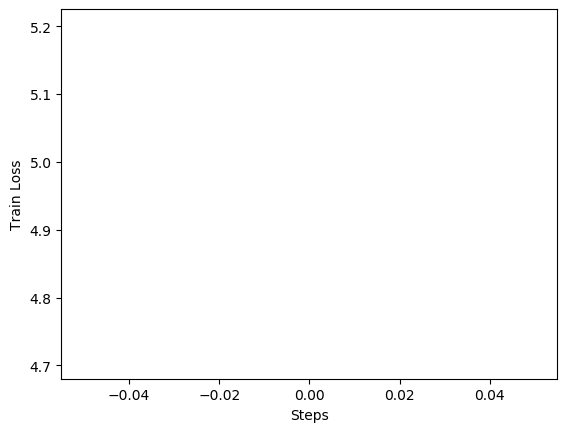

In [43]:
import matplotlib.pyplot as plt

plt.ylabel('Train Loss')
plt.xlabel('Steps')
plt.plot(trial.steps(mode=ModeKeys.TRAIN),
         list(trial.tensor('CrossEntropyLoss_output_0').values(mode=ModeKeys.TRAIN).values()))
plt.show()

In [67]:
!pip install --upgrade babel
!pip install --upgrade python-dateutil
!pip install --upgrade flask-moment
!pip install --upgrade flask-wtf
!pip install --upgrade flask_sqlalchemy




Keyring is skipped due to an exception: 'keyring.backends'
Keyring is skipped due to an exception: 'keyring.backends'
Keyring is skipped due to an exception: 'keyring.backends'
Keyring is skipped due to an exception: 'keyring.backends'
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 136.5/136.5 kB 2.9 MB/s eta 0:00:0000:01
Keyring is skipped due to an exception: 'keyring.backends'
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 19.4 MB/s eta 0:00:00:00:01
  Attempting uninstall: SQLAlchemy
    Found existing installation: SQLAlchemy 1.3.13
    Uninstalling SQLAlchemy-1.3.13:
      Successfully uninstalled SQLAlchemy-1.3.13


In [68]:
from jinja2 import Environment, Markup

ImportError: cannot import name 'Markup' from 'jinja2' (/opt/conda/lib/python3.7/site-packages/jinja2/__init__.py)

In [69]:
# TODO: Display the profiler output

from smdebug.profiler.analysis.notebook_utils.training_job import TrainingJob

tj = TrainingJob(training_job_name, region)
tj.wait_for_sys_profiling_data_to_be_available()

from smdebug.profiler.analysis.notebook_utils.timeline_charts import TimelineCharts

system_metrics_reader = tj.get_systems_metrics_reader()
system_metrics_reader.refresh_event_file_list()

view_timeline_charts = TimelineCharts(
    system_metrics_reader,
    framework_metrics_reader=None,
    select_dimensions=["CPU", "GPU"],
    select_events=["total"],
)


ImportError: cannot import name 'Markup' from 'jinja2' (/opt/conda/lib/python3.7/site-packages/jinja2/__init__.py)

In [ ]:
rule_output_path = estimator.output_path + estimator.latest_training_job.job_name + "/rule-output"
print(f"You will find the profiler report in {rule_output_path}")

In [ ]:
! aws s3 ls {rule_output_path} --recursive
! aws s3 cp {rule_output_path} ./ --recursive

In [ ]:
import os

# get the autogenerated folder name of profiler report
profiler_report_name = [
    rule["RuleConfigurationName"]
    for rule in estimator.latest_training_job.rule_job_summary()
    if "Profiler" in rule["RuleConfigurationName"]
][0]

import IPython

IPython.display.HTML(filename=profiler_report_name + "/profiler-output/profiler-report.html")

## Model Deploying

In [ ]:
# TODO: Deploy your model to an endpoint

predictor=estimator.deploy(initial_instance_count=1, instance_type="ml.t2.medium") # TODO: Add your deployment configuration like instance type and number of instances

In [ ]:
# TODO: Run an prediction on the endpoint

from PIL import Image

from torchvision import transforms

filename = "./dogImages/test/001.Affenpinscher/Affenpinscher_00023.jpg"

input_image = Image.open(filename)



In [ ]:
preprocess = transforms.Compose([
            transforms.Resize(256),
            transforms.CenterCrop(224),
            transforms.ToTensor(),
            transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
        ]),


image_input = preprocess(input_image) # TODO: Your code to load and preprocess image to send to endpoint for prediction
image = image.unsqueeze(0)
response = predictor.predict(image)

In [ ]:
# TODO: Remember to shutdown/delete your endpoint once your work is done
predictor.delete_endpoint()